In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet("../data/processed/daily_with_embeddings.parquet")

In [4]:
print(df.shape)
df.head()

(60, 777)


,ticker,date,open,high,low,close,volume,return_t+1,headlines,bert_0,...,bert_758,bert_759,bert_760,bert_761,bert_762,bert_763,bert_764,bert_765,bert_766,bert_767
0,AAPL,2025-04-01,219.809998,223.679993,218.899994,223.190002,36412700.0,0.003136,[Visa Offers Apple Roughly $100 Million to Tak...,-0.442461,...,-0.035067,0.044757,0.157056,-0.038947,0.242718,0.172584,-0.098469,-0.399835,0.348070,0.257704
1,AAPL,2025-04-02,221.320007,225.190002,221.020004,223.889999,35905900.0,-0.092456,['Liberation Day' Tariffs: Potential Impact On...,-0.216674,...,0.011417,0.108019,-0.037402,-0.112583,0.218068,0.090833,-0.223260,-0.310410,0.334178,0.281259
2,AAPL,2025-04-03,205.539993,207.490005,201.250000,203.190002,103419000.0,-0.072887,[Should you sell these 5 tech stocks heavily e...,-0.342588,...,0.038956,0.166851,0.085025,-0.083835,0.339319,-0.080361,-0.182703,-0.342535,0.465671,0.162697
3,AAPL,2025-04-04,193.889999,199.880005,187.339996,188.380005,125910900.0,-0.036734,"[Nike, Lululemon Rebound as Trump Touts Call W...",-0.251365,...,-0.036844,0.077379,0.084332,-0.068888,0.244759,0.059793,-0.181762,-0.324983,0.444287,0.229740
4,AAPL,2025-04-07,177.199997,194.149994,174.619995,181.460007,160466300.0,-0.049818,[Sector Update: Tech Stocks Rise Late Afternoo...,-0.335384,...,0.063420,0.071872,0.132654,-0.060173,0.405396,-0.012562,-0.121641,-0.292873,0.413170,0.197883


In [ ]:
def plot_stock_prices(df, price_col="open", N=5, y_min=150, y_max=600, rotation=45):
    """
    Plot stock prices over time for each ticker. Can show 'open', 'close', or both.

    Parameters:
        df (pd.DataFrame): Must include columns ['ticker', 'date', 'open', 'close']
        price_col (str): 'open', 'close', or 'both'
        N (int): Show every Nth x-tick
        y_min, y_max (float): y-axis limits
        rotation (int): X-axis label rotation
    """
    tickers = df["ticker"].unique()
    colors = cm.get_cmap("tab10", len(tickers))

    for i, ticker in enumerate(tickers):
        df_ticker = df[df["ticker"] == ticker]
        color = colors(i)

        if price_col in ("open", "both"):
            plt.plot(df_ticker["date"], df_ticker["open"], label=f"{ticker} open", color=color)

        if price_col in ("close", "both"):
            plt.plot(df_ticker["date"], df_ticker["close"], label=f"{ticker} close", color=color, linestyle="--")

    # Legend and labels
    plt.legend()
    ticks = plt.xticks()[0]
    plt.xticks(
        ticks=ticks[::N],
        labels=[label.get_text() for i, label in enumerate(plt.gca().get_xticklabels()) if i % N == 0],
        rotation=rotation
    )
    plt.ylim(y_min, y_max)
    plt.xlabel("Date")
    plt.ylabel("Price ($)")
    plt.title(f"Stock Price Over Time")
    plt.tight_layout()
    plt.show()



C:\Users\asacco\AppData\Local\Temp\ipykernel_28740\3214075329.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("tab10", len(tickers))


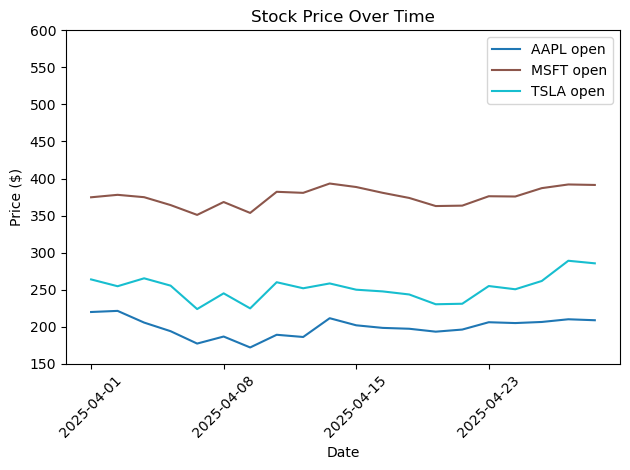

In [ ]:
plot_stock_prices(df, "both", 5, 150, 600, 45)